<a href="https://colab.research.google.com/github/Bertha-ding/independent-study/blob/main/phase2_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats

In [31]:
def f_1(x):
  return x**2
def f_2(x,y):
  return x**2+y**2
def f_3(x,y):
  return (1-x)**2+100*(y-x**2)**2
def f_4(x):
  return x**2-x+2
def f_5(x):
  return (x**2)/2-2*x+1

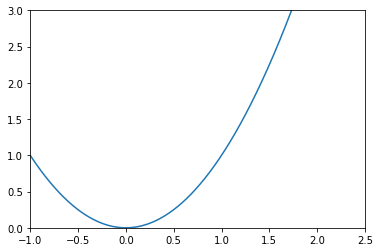

In [ ]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_1(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

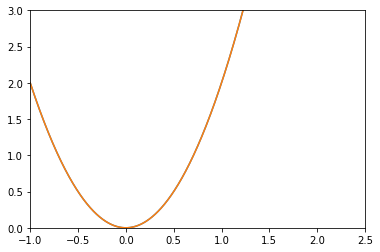

In [ ]:
x = np.linspace(-1,2.5,1000)
y = np.linspace(-1,2.5,1000)
plt.plot(x,f_2(x,y))
plt.plot(y,f_2(x,y))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

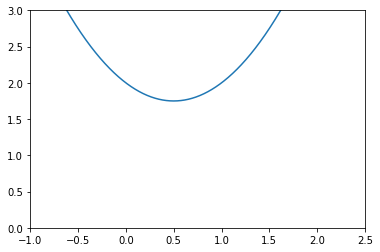

In [ ]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_4(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

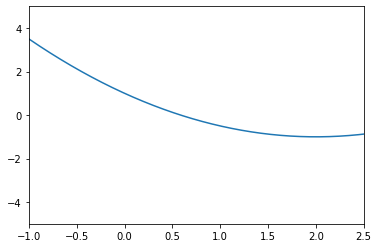

In [ ]:
x = np.linspace(-1,5,1000)
plt.plot(x,f_5(x))
plt.xlim([-1,2.5])
plt.ylim([-5,5])
plt.show()

In [ ]:
def grad_1(x):
  return 2*x
def grad_2(x,y):
  return [2*x,2*y]
def grad_3(x,y):
  grad_x=400*x*(x**2)-400*x*y+2*x-2
  grad_y=200*y-200*x**2
  return [grad_x,grad_y]
def grad_4(x):
  return 2*x-1
def grad_5(x):
  return x-2

In [ ]:
def gd_1var(x_new,f_x,grad, alpha,precision = 0.0001):
    x_old = 0
    x_new = 2 #initial point
    x_list = [x_new]
    while abs(x_new - x_old) > precision:
        x_old = x_new
        x_new = x_old - alpha * grad(x_old)
        x_list.append(x_new)
    print("Local minimum occurs at:", x_new)
    print("Number of steps:", len(x_list))



In [ ]:
def gd_2var(x,y,f_x, grad, alpha, precision = 0.0001):
    x_old = 0
    y_old = 0
    x_new = 2 #initial point
    y_new = 3
    x_list,y_list = [x_new],[y_new] 
    while abs(x_new - x_old)+abs(y_new - y_old) > precision:
        x_old = x_new
        y_old = y_new
        grad_xy = grad(x_old,y_old)
        x_new = x_old - alpha * grad_xy[0]
        y_new = y_old - alpha * grad_xy[1]
        x_list.append(x_new)
        y_list.append(y_new)
    print("Local minimum occurs at:", (x_new,y_new))
    print("Number of steps:", len(x_list))

In [ ]:
gd_1var(2,f_1, grad_1, alpha=0.001, precision = 0.0001)

Local minimum occurs at: 0.04985952417460472
Number of steps: 1845


In [ ]:
gd_2var(2,3,f_2, grad_2, alpha=0.01, precision = 0.0001)

Local minimum occurs at: (0.0019569239939815283, 0.0029353859909722955)
Number of steps: 344


In [ ]:
gd_2var(2,3,f_3, grad_3, alpha=0.002, precision = 0.0001)

Local minimum occurs at: (0.959913358887822, 0.9212693375271221)
Number of steps: 2885


In [ ]:
def ngd_1var(x,f_x,grad, alpha,precision = 0.0001):
    x_old = 0
    x_new = 2 #initial point
    x_list = [x_new]
    for i in range(1000):
      while abs(x_new - x_old) > precision:
          z = x_new +((i-1)/(i+2))*(x_new-x_old)
          x_new = z - alpha * grad(z)
          x_list.append(x_new)
          if i%10000 ==0:
            print("Local minimum occurs at:", x_new)
            print("Number of steps:", len(x_list))


In [ ]:
def ngd_2var(x,y,f_x,grad, alpha,precision):
    x_old = 0
    y_old = 0
    x_new = 2 #initial point
    y_new = 3
    x_list,y_list = [x_new],[y_new] 
    for i in range(100):
      while abs(x_new - x_old) + abs(y_new - y_old)> precision:
          z = x_new +((i-1)/(i+2))*(x_new-x_old)
          h = y_new +((i-1)/(i+2))*(y_new-y_old)
          grad_xy = grad(z,h)
          x_new = z - alpha * grad_xy[0]
          y_new = h - alpha * grad_xy[0]
          x_list.append(x_new)
          y_list.append(y_new)
          if i%100==0:
            print("Local minimum occurs at:", (x_new,y_new))
            print("Number of steps:", len(x_list))


In [ ]:
ngd_1var(2,f_1, grad_1, alpha=0.1, precision = 0.0001)

Local minimum occurs at: 0.8
Number of steps: 2
Local minimum occurs at: 0.32
Number of steps: 3
Local minimum occurs at: 0.128
Number of steps: 4
Local minimum occurs at: 0.0512
Number of steps: 5
Local minimum occurs at: 0.02048
Number of steps: 6
Local minimum occurs at: 0.008192000000000001
Number of steps: 7
Local minimum occurs at: 0.0032768000000000007
Number of steps: 8
Local minimum occurs at: 0.0013107200000000002
Number of steps: 9
Local minimum occurs at: 0.0005242880000000001
Number of steps: 10
Local minimum occurs at: 0.00020971520000000006
Number of steps: 11
Local minimum occurs at: 8.388608000000002e-05
Number of steps: 12


In [ ]:
ngd_2var(2,3, f_2, grad_2, alpha=0.1, precision = 0.0001)

Local minimum occurs at: (0.8, 1.3)
Number of steps: 2
Local minimum occurs at: (0.32, 0.5700000000000001)
Number of steps: 3
Local minimum occurs at: (0.128, 0.253)
Number of steps: 4
Local minimum occurs at: (0.0512, 0.1137)
Number of steps: 5
Local minimum occurs at: (0.02048, 0.05173)
Number of steps: 6
Local minimum occurs at: (0.008192000000000001, 0.023816999999999998)
Number of steps: 7
Local minimum occurs at: (0.0032768000000000007, 0.011089299999999998)
Number of steps: 8
Local minimum occurs at: (0.0013107200000000002, 0.005216969999999999)
Number of steps: 9
Local minimum occurs at: (0.0005242880000000001, 0.0024774129999999995)
Number of steps: 10
Local minimum occurs at: (0.00020971520000000006, 0.0011862776999999997)
Number of steps: 11
Local minimum occurs at: (8.388608000000002e-05, 0.0005721673299999998)
Number of steps: 12
Local minimum occurs at: (3.3554432000000006e-05, 0.0002776950569999999)
Number of steps: 13
Local minimum occurs at: (1.3421772800000002e-05, 0.

In [ ]:
ngd_2var(2,3,f_3, grad_3, alpha=0.001, precision = 0.01)

Local minimum occurs at: (1.2, 1.7)
Number of steps: 2
Local minimum occurs at: (0.7183999999999999, 0.9683999999999999)
Number of steps: 3
Local minimum occurs at: (0.41151319572479994, 0.5365131957247999)
Number of steps: 4
Local minimum occurs at: (0.2259389644150352, 0.2884389644150352)
Number of steps: 5
Local minimum occurs at: (0.12068381202654328, 0.1519338120265433)
Number of steps: 6
Local minimum occurs at: (0.06396693189560905, 0.07959193189560906)
Number of steps: 7
Local minimum occurs at: (0.0344155372911571, 0.04222803729115711)
Number of steps: 8
Local minimum occurs at: (0.019316645029122833, 0.023222895029122836)
Number of steps: 9
Local minimum occurs at: (0.011683504327846563, 0.013636629327846565)
Number of steps: 10
Local minimum occurs at: (0.007845921278958909, 0.00882248377895891)
Number of steps: 11
Local minimum occurs at: (0.005922012620372268, 0.006410293870372269)
Number of steps: 12
Local minimum occurs at: (0.004958870097367564, 0.005203010722367564)
Nu

In [3]:
#Q4
def gradient(x,i):
  if i == 1:
    gradient= 2*x
  else:
    gradient = 2*(x-2)
  return gradient

In [4]:
from scipy.stats import bernoulli
def sgd(x,alpha,steps,precision):
  x_new=4
  x_old=0
  x_list=[x_new]
  while abs(x_new - 0.5) > precision:
      j= bernoulli.rvs(0.5)
      grad = gradient(x,j)
      x_old = x_new
      x_new=x_old-alpha*grad
      x_list.append(x_new)
  print("Local minimum occurs at:", x_new)
  print("Number of steps:", len(x_list))

In [5]:
sgd(4,0.001,1000,0.01)

Local minimum occurs at: 0.5039999999999969
Number of steps: 571


In [6]:
def N_sgd(x,alpha,steps,precision):
  x_new=4
  x_old=0
  x_list=[x_new]
  for i in range(steps):
    while abs(x_new - 0.5) > precision:
        j= bernoulli.rvs(0.5)
        grad = gradient(x,j)
        z = x_new+((i-1)/(i+2))*(x_new-x_old)
        x_new = z - alpha * grad
        x_list.append(x_new)
        print("Local minimum occurs at:", x_new)
        print("Number of steps:", len(x_list))

In [7]:
N_sgd(4,0.001,100,0.1)

Local minimum occurs at: 1.996
Number of steps: 2
Local minimum occurs at: 0.99
Number of steps: 3
Local minimum occurs at: 0.491
Number of steps: 4


In [8]:
#Q5
def gradient1(x,i):
  if i == 1:
    gradient= -2*x
  else:
    gradient = 4*(x-1)
  return gradient
def sgd(x,alpha,steps,precision):
  x_new=4
  x_old=0
  x_list=[x_new]
  while abs(x_new - 2) > precision:
      j= bernoulli.rvs(0.5)
      grad = gradient1(x,j)
      x_old = x_new
      x_new=x_old-alpha*grad
      x_list.append(x_new)
  print("Local minimum occurs at:", x_new)
  print("Number of steps:", len(x_list))


In [9]:
sgd(4,0.001,1000,0.01)

Local minimum occurs at: 2.0079999999999996
Number of steps: 937


In [10]:
def N_sgd1(x,alpha,steps,precision):
  x_new=4
  x_old=0
  x_list=[x_new]
  for i in range(steps):
    while abs(x_new - 2) > precision:
        j= bernoulli.rvs(0.5)
        grad = gradient1(x,j)
        z = x_new+((i-1)/(i+2))*(x_new-x_old)
        x_new = z - alpha * grad
        x_list.append(x_new)
        print("Local minimum occurs at:", x_new)
        print("Number of steps:", len(x_list))

In [12]:
N_sgd1(4,0.001,100,0.01)

Local minimum occurs at: 2.008
Number of steps: 2
